In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import GridSearchCV

In [2]:
df=pd.read_csv(r"E:\Courses\Data science(ETLHive)\dataset\KNN_Project_Data")

In [3]:
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


In [4]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [5]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [10]:
scaled=sc.fit_transform(x)
scaled_df=pd.DataFrame(scaled,columns=df.columns[:-1])

In [11]:
scaled_df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


In [14]:
np.mean(3 != 3)

0.0

In [16]:
x_train,x_test,y_train,y_test=train_test_split(scaled_df,y,test_size=0.33)

### Choosing k value

In [23]:
error=[]
for i in range(1,40,2):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i=knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))

In [24]:
error

[0.27575757575757576,
 0.2,
 0.18787878787878787,
 0.17575757575757575,
 0.18181818181818182,
 0.17575757575757575,
 0.1696969696969697,
 0.15757575757575756,
 0.17272727272727273,
 0.16363636363636364,
 0.16363636363636364,
 0.16363636363636364,
 0.17272727272727273,
 0.1696969696969697,
 0.16363636363636364,
 0.16363636363636364,
 0.1696969696969697,
 0.1696969696969697,
 0.16666666666666666,
 0.16363636363636364]

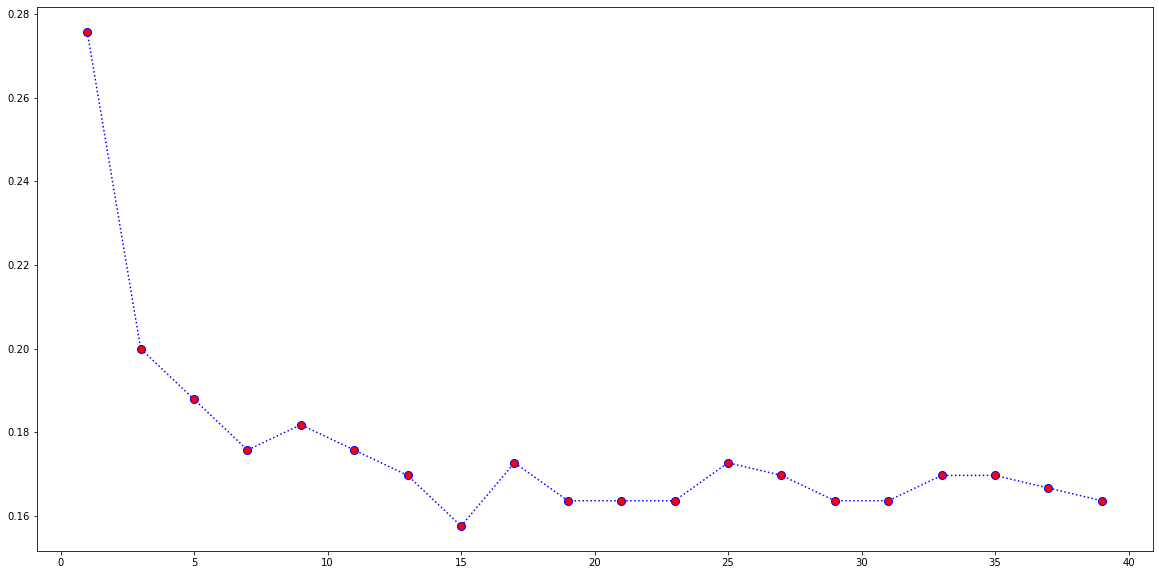

In [25]:
plt.figure(figsize=(20,10))
plt.plot(range(1,40,2),error,color='blue',linestyle='dotted',marker='o',markerfacecolor='red',markersize=8)
plt.title = 'K Values VS Error Rates'
plt.xlabel = 'K Value'
plt.ylabel= 'Error'
plt.show()

### for k=15 we are getting less error so we will build model by taking k=15

In [41]:
knn=KNeighborsClassifier(n_neighbors=15)

In [42]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=15)

In [28]:
pred=knn.predict(x_test)

In [31]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.86      0.81      0.83       160
           1       0.83      0.88      0.85       170

    accuracy                           0.84       330
   macro avg       0.84      0.84      0.84       330
weighted avg       0.84      0.84      0.84       330



In [32]:
accuracy_score(y_test,pred)

0.8424242424242424

### hyperparameter tunning

In [74]:
param={"n_neighbors":np.arange(1,50,2)}
knn=KNeighborsClassifier()
grid=GridSearchCV(knn,param_grid=param,cv=3)
grid.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49])})

In [75]:
print(grid.best_params_)
print(grid.best_score_)

{'n_neighbors': 25}
0.8387785607516549
